In [32]:
# Lista de archivos a procesar
file_paths = ["quijote.txt"]

In [33]:
import sys
import pathlib
import os
from nltk.stem.snowball import SpanishStemmer
import re

In [34]:
MIN_LENGTH = 2
MAX_LENGTH = 25
stemming_enabled = False
palabras_vacias = []

In [35]:
def remove_punctuation(token):
    return re.sub("\W", "", token)

def translate(to_translate):
    tabin = u'áäâàãéëèêẽíïĩìîóõöòôúüùûũ'
    tabout = u'aaaaaeeeeeiiiiiooooouuuuu'
    tabin = [ord(char) for char in tabin]
    translate_table = dict(zip(tabin, tabout))
    return to_translate.translate(translate_table)

def normalize(token):
    result = token.lower()
    result = translate(result)       
    return result

In [36]:
frequencies = {}

tokens = []
terms = []

total_tokens  = 0
total_terms = 0

if stemming_enabled:
    stemmer = SpanishStemmer()

for in_file in file_paths:
    with open(in_file, "r", encoding="utf-8") as f:
        for line in f.readlines():
            tokens_list = [remove_punctuation(normalize(x)) for x in line.strip().split()]

            for token in tokens_list:                                     
                total_tokens += 1                
                if token not in palabras_vacias and len(token) >= MIN_LENGTH and len(token) <= MAX_LENGTH:
                    if stemming_enabled:
                        token = stemmer.stem(token)
                    if token in frequencies.keys():
                        frequencies[token] += 1                        
                    else: # Si es la primera vez que veo este token, se agrega a los términos en 1
                        frequencies[token] = 1
                        total_terms += 1                
                terms.append(total_terms)


In [37]:
y_terms = terms
x_tokens = list(range(1, total_tokens+1))

Para verificar la Ley de Heaps vamos almacenando la cuenta de tokens procesados cada vez que aparece un término nuevo. Luego generamos el rango de valores (en definitiva, serán los mismos que si hubiéramos guardado el valor al momento de actualizar la cuenta de términos) para así contar con dos vectores, a partir de los cuales generar un gráfico como el que sigue:

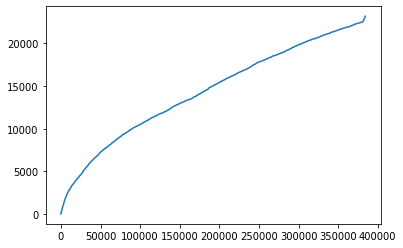

In [38]:
import matplotlib.pyplot as plt
plt.plot(x_tokens, y_terms)
plt.show()